#Librerias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import copy
#%matplotlib inline

#Principal
Aqui se maneja el codigo, se puede modificar:
  
  -El punto inicial de Newton-Raphson
  
  -Vector inicial

  -La funcion a evaluar

  Eng:
  
  Here you can control the code, you can modify:
  
  -The initial point in Newton-Raphson Method

  -The initial Vector

  -The function to evaluate


* Iteracion 1   - Vector: [0.8388507183010621, -1.0308140745367478]   - F(V): -0.5978555069748075
* Iteracion 2   - Vector: [0.6358833569806939, -0.7442719173785824]   - F(V): -0.6870892071499171
* Iteracion 3   - Vector: [0.6259799636664626, -0.7512868209761628]   - F(V): -0.6874981175556916
* Iteracion 4   - Vector: [0.6250498726143865, -0.7499737512555856]   - F(V): -0.6874999913737629
* Iteracion 5   - Vector: [0.6250044906502777, -0.750005896813496]   - F(V): -0.6874999999604705


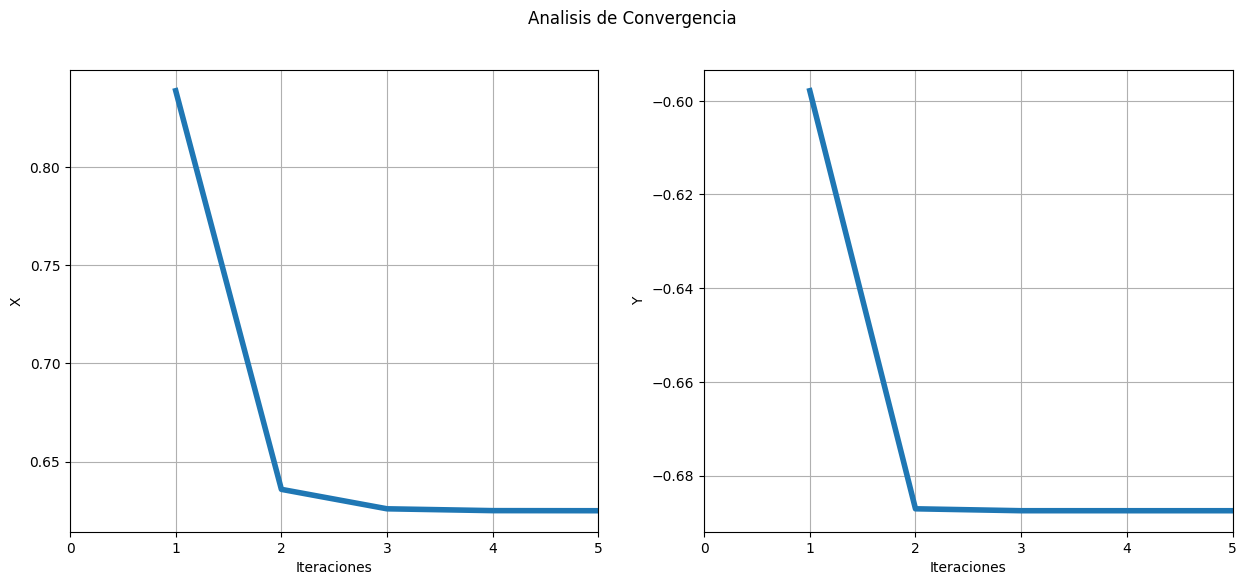

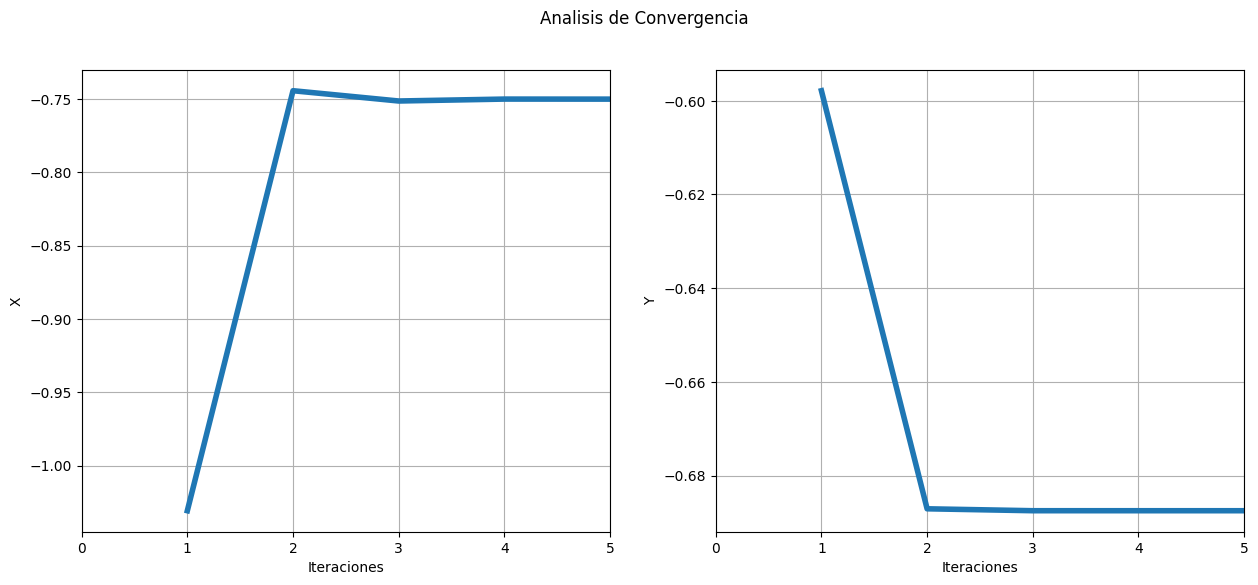

In [ ]:
Inic=0
vector=[3,0.5]

#Funcion Mods
numvar=2
x=sympy.symbols('x')
y=sympy.symbols('y')
namevar=['x','y']


#f=100*(y-x**2)**2-(1-x)**2
f=2*x**2+2*x*y+(3/2)*y**2-x+y



TF=100
TG=100

Contador=0
Registrox=[]
Registroy=[]
while(np.abs(TF)>0.001 and TG>0.001):
  TF=0
  TG=0

  #Evaluamos gradiente en el vector
  EvalGrad=Gradiente(vector)



  #Obtenemos el paso (es decir alpha)
  x=Paso(EvalGrad,vector,Inic)



  #Sacamos al nuevo vector
  for i in range(0,numvar):
    vector[i]=vector[i]+x*EvalGrad[i]



  #Obtenemos la norma del gradiente
  for i in range(0,numvar):
    TG+=EvalGrad[i]**2

  TG=np.sqrt(TG)

  #Obtenemos el evaluado del vector
  Fev=f
  for i in range(0,numvar):
    Fev=Fev.subs(namevar[i],vector[i])


  TF=float(Fev)

  #Agregamos a registro
  Contador+=1
  Registrox.append([Contador,vector[0],TF])
  Registroy.append([Contador,vector[1],TF])
  print("* Iteracion",Contador,"  - Vector:",vector,"  - F(V):",float(TF))

Evaluacion(Registrox)
Evaluacion(Registroy)

#Gradiente

In [ ]:

def Gradiente(vector):

    grad=[]
    #Creacion Gradiente
    for i in range (0,numvar):
        g=-1*sympy.diff(f,namevar[i])
        grad.append(g)

    #evaluacion del gradiente en los puntos
    for i in range(0,numvar):
      for j in range(0,numvar):
        grad[i]=grad[i].subs(namevar[j],vector[j])
    #convertir a float
    for i in range(0,numvar):
      grad[i]=float(grad[i])


    return grad

#Paso

In [ ]:
def Paso(Grad,Vector,Inic):
  a=sympy.symbols('a')

  #Obtenemos x_0+S
  S=[]
  for i in range(numvar):
    S.append(Vector[i]+Grad[i]*a)

  #Obtenemos fa sustituyendo por alpha
  fa=f
  for i in range(numvar):
    fa=fa.subs(namevar[i],S[i])

  #Resolvemos para alpha
  x=NewtonRaphson(Inic,fa)
  return x

In [ ]:
#Metodo de newton-Raphson
def NewtonRaphson(Inic,fa):
  a=sympy.symbols('a')
  #Declaramos punto de inicio
  x=Inic

  #establecemos nociones previas
  Previo=1000
  Epsilon=0.001

  Contador=0
  Registro=[]

  #Obtanemos las derivadas
  fad=sympy.diff(fa)
  fadd=sympy.diff(fad)

  #Iniciamos metodo
  while(np.abs(x-Previo)>Epsilon):
    #obtenemos sus dos derivadas
    D1x=float(fad.subs(a,x))
    D2x=float(fadd.subs(a,x))
    #Establecemos el nuevo valor de x
    Previo=x
    x=Previo-(D1x/D2x)

    #Evaluamos
    Fx=float(fa.subs(a,x))


    #Agregamos a registro
    Contador+=1
    #Registro.append([Contador,x,Fx])
    #print("* Iteracion",Contador,"  - X:",float(x),"  - Y:",float(Fx))

  return x

#Evaluacion

In [ ]:
#Evalua los registros dados de los metodos
def Evaluacion(Registro):
  #Conversion para facilitar la graficacion
  Registro=np.array(Registro)

  fig, axs=plt.subplots(1,2,figsize=(15,6))
  #Ponemos titulo
  fig.suptitle('Analisis de Convergencia')
  #Primera Grafica
  axs[0].plot(Registro[:,0],Registro[:,1],linewidth=4)
  axs[0].set_xlabel('Iteraciones')
  axs[0].set_ylabel('X')
  axs[0].grid()
  axs[0].set_xlim([0,len(Registro)])
  #Segunda Grafica
  axs[1].plot(Registro[:,0],Registro[:,2],linewidth=4)
  axs[1].set_xlabel('Iteraciones')
  axs[1].set_ylabel('Y')
  axs[1].grid()
  axs[1].set_xlim([0,len(Registro)])
  #Mostramos las graficas
  plt.show()